In [1]:
import pandas as pd
import numpy as np
df = pd.read_json("Dataset for Detection of Cyber-Trolls.json",lines="True")
print(df.head(5))

                                             content  \
0                             Get fucking real dude.   
1   She is as dirty as they come  and that crook ...   
2   why did you fuck it up. I could do it all day...   
3   Dude they dont finish enclosing the fucking s...   
4   WTF are you talking about Men? No men thats n...   

                      annotation  extras  
0  {'notes': '', 'label': ['1']}     NaN  
1  {'notes': '', 'label': ['1']}     NaN  
2  {'notes': '', 'label': ['1']}     NaN  
3  {'notes': '', 'label': ['1']}     NaN  
4  {'notes': '', 'label': ['1']}     NaN  


In [2]:
for i in range(0,len(df)):
    if df.annotation[i]['label'][0] == '1':
        df.annotation[i] = 1
    else:
        df.annotation[i] = 0

C:\Users\kaart\AppData\Local\Temp\ipykernel_15144\1367284056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 1
C:\Users\kaart\AppData\Local\Temp\ipykernel_15144\1367284056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 0


In [3]:
df = df.rename(columns = {'content':'text'})
df.drop(['extras'],axis = 1,inplace = True)
df.head(5)

,text,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [4]:
df.shape

(20001, 2)

<Axes: >

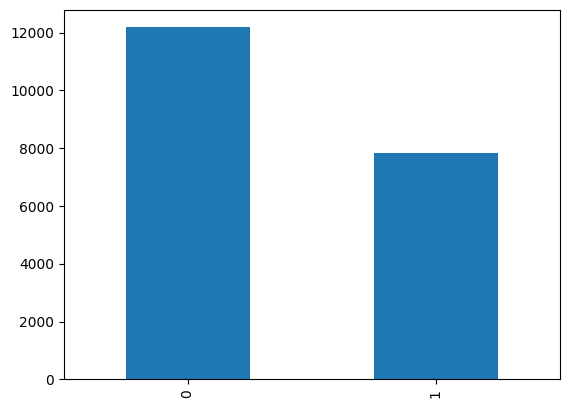

In [5]:

import matplotlib.pyplot as plt
df['annotation'].value_counts().sort_index().plot.bar()

In [6]:
# Count the number of 1's and 0's in the 'CB_Label' column
counts = df['annotation'].value_counts()

# Print the counts
print("Number of 1's:", counts[1])
print("Number of 0's:", counts[0])

Number of 1's: 7822
Number of 0's: 12179


In [7]:
# Step 1: Count the occurrences of each label
label_counts = df['annotation'].value_counts()

# Step 2: Check if both labels exist and calculate the bias ratio
if 1 in label_counts and 0 in label_counts:
    bias_ratio = label_counts[1] / label_counts[0]
    print("Bias ratio:", bias_ratio)
else:
    print("Cannot calculate bias ratio: One or both labels are missing.")


Bias ratio: 0.6422530585433943


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

df['annotation'] = df['annotation'].astype(int)

# Encode the labels
label_encoder = LabelEncoder()
df['annotation'] = label_encoder.fit_transform(df['annotation'])

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'])

# Define the SMOTE oversampler
smote = SMOTE(random_state=42)

# Resample the data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, df['annotation'])

# Create a DataFrame from the resampled data
df_resampled = pd.DataFrame(X_resampled.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_resampled['annotation'] = y_resampled

# Check the class distribution after oversampling with SMOTE
class_counts_after = df_resampled['annotation'].value_counts()
print("\nClass distribution after oversampling with SMOTE:")
print(class_counts_after)


Class distribution after oversampling with SMOTE:
1    12179
0    12179
Name: annotation, dtype: int64


In [74]:
#!pip install nltk


In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import re

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaart\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaart\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

def preprocess_text(text):
    # Remove special characters and lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    # Join tokens back into sentence
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

# Apply preprocessing to content column
df['processed_text'] = df['text'].apply(preprocess_text)

# Display the DataFrame with processed content
print(df[['text', 'processed_text']])


                                                    text  \
0                                 Get fucking real dude.   
1       She is as dirty as they come  and that crook ...   
2       why did you fuck it up. I could do it all day...   
3       Dude they dont finish enclosing the fucking s...   
4       WTF are you talking about Men? No men thats n...   
...                                                  ...   
19996    I dont. But what is complaining about it goi...   
19997   Bahah  yeah i&;m totally just gonna&; get pis...   
19998       hahahahaha >:) im evil mwahahahahahahahahaha   
19999            What&;s something unique about Ohio? :)   
20000              Who is the biggest gossiper you know?   

                                          processed_text  
0                                     get fuck real dude  
1      dirti come crook rengel dem fuck corrupt joke ...  
2      fuck could day let hour ping later sched write...  
3      dude dont finish enclos fuck shower 

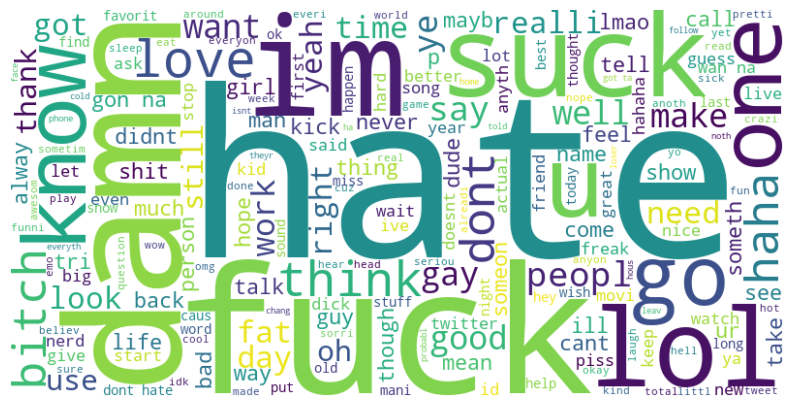

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize the processed_text column
tokenized_text = df['processed_text'].apply(lambda x: x.split())

# Combine all tokens into a single string
all_words = ' '.join([word for sublist in tokenized_text for word in sublist])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [12]:
# Step 1: Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['annotation'], test_size=0.2, random_state=42)

# Step 2: Feature Extraction/Selection (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2424
           1       0.72      0.65      0.68      1577

    accuracy                           0.76      4001
   macro avg       0.75      0.74      0.75      4001
weighted avg       0.76      0.76      0.76      4001

Accuracy: 0.7641
Precision: 0.7615
Recall: 0.7641
F1-score: 0.7615


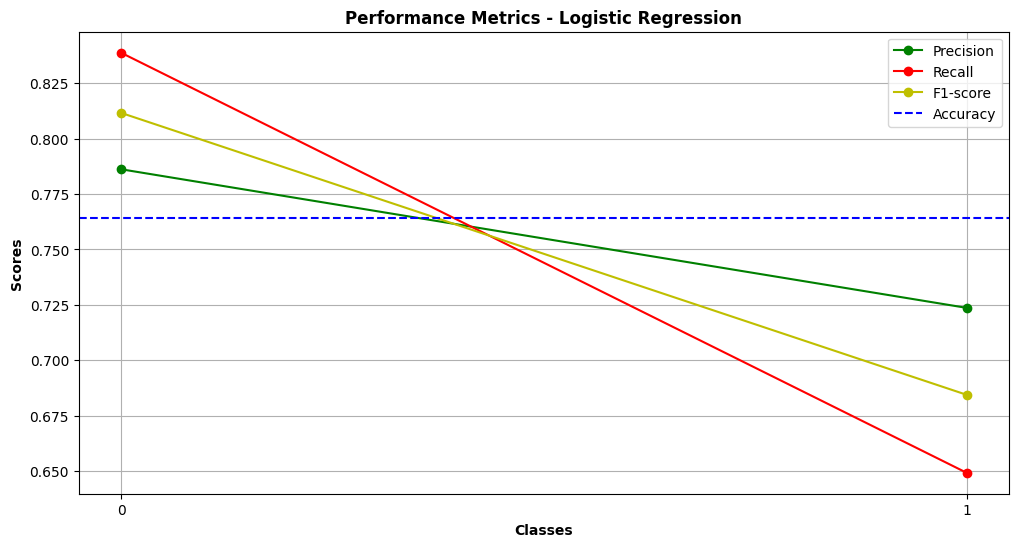

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Step 3: Model Selection
model_lr = LogisticRegression()

# Step 4: Model Training
model_lr.fit(X_train_tfidf, y_train)

# Step 5: Model Evaluation
y_pred_lr = model_lr.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred_lr)

# Print the full classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Calculate overall precision, recall, and F1 score
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

# Print the overall metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Extract metrics for plotting (for each class)
report = classification_report(y_test, y_pred_lr, output_dict=True)
precision_per_class = [report[label]['precision'] for label in report.keys() if label.isdigit()]
recall_per_class = [report[label]['recall'] for label in report.keys() if label.isdigit()]
f1_score_per_class = [report[label]['f1-score'] for label in report.keys() if label.isdigit()]
classes = [int(label) for label in report.keys() if label.isdigit()]

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot lines for precision, recall, and F1-score
plt.plot(classes, precision_per_class, marker='o', color='g', label='Precision')
plt.plot(classes, recall_per_class, marker='o', color='r', label='Recall')
plt.plot(classes, f1_score_per_class, marker='o', color='y', label='F1-score')
plt.axhline(y=accuracy, color='b', linestyle='--', label='Accuracy')  # Plot horizontal line for accuracy

# Change x-labels to reflect class labels
plt.xticks(classes)

# Add labels and title
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Metrics - Logistic Regression', fontweight='bold')

# Add legend
plt.legend()

# Show the graph
plt.grid(True)
plt.show()


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2424
           1       0.86      0.95      0.90      1577

    accuracy                           0.92      4001
   macro avg       0.91      0.93      0.92      4001
weighted avg       0.93      0.92      0.92      4001

Accuracy: 0.9205
Precision: 0.9253
Recall: 0.9205
F1-score: 0.9211


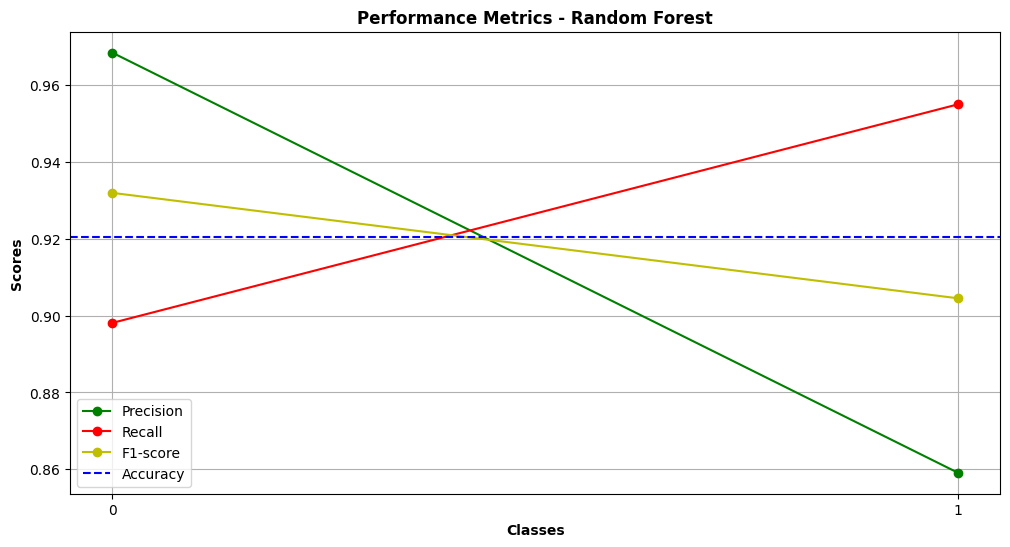

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Step 3: Model Selection
model_rf = RandomForestClassifier()

# Step 4: Model Training
model_rf.fit(X_train_tfidf, y_train)

# Step 5: Model Evaluation
y_pred_rf = model_rf.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the full classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Calculate overall precision, recall, and F1 score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print the overall metrics
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

# Extract metrics for plotting (for each class)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
precision_per_class_rf = [report_rf[label]['precision'] for label in report_rf.keys() if label.isdigit()]
recall_per_class_rf = [report_rf[label]['recall'] for label in report_rf.keys() if label.isdigit()]
f1_score_per_class_rf = [report_rf[label]['f1-score'] for label in report_rf.keys() if label.isdigit()]
classes_rf = [int(label) for label in report_rf.keys() if label.isdigit()]

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot lines for precision, recall, and F1-score
plt.plot(classes_rf, precision_per_class_rf, marker='o', color='g', label='Precision')
plt.plot(classes_rf, recall_per_class_rf, marker='o', color='r', label='Recall')
plt.plot(classes_rf, f1_score_per_class_rf, marker='o', color='y', label='F1-score')
plt.axhline(y=accuracy_rf, color='b', linestyle='--', label='Accuracy')  # Plot horizontal line for accuracy

# Change x-labels to reflect class labels
plt.xticks(classes_rf)

# Add labels and title
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Metrics - Random Forest', fontweight='bold')

# Add legend
plt.legend()

# Show the graph
plt.grid(True)
plt.show()


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2424
           1       0.72      0.80      0.76      1577

    accuracy                           0.80      4001
   macro avg       0.79      0.80      0.80      4001
weighted avg       0.81      0.80      0.80      4001

Accuracy: 0.8013
Precision: 0.8068
Recall: 0.8013
F1-score: 0.8027


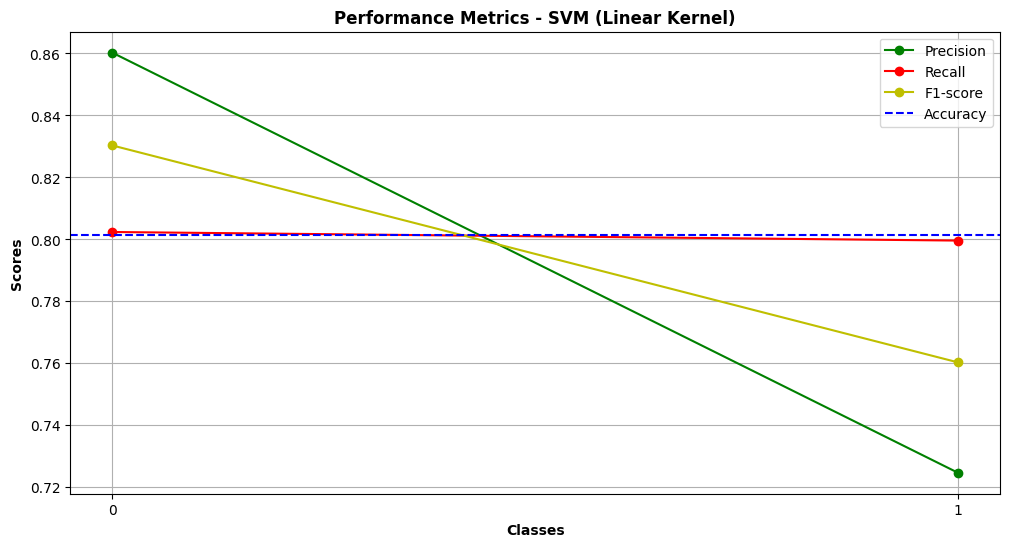

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 3: Model Selection
model_svm = SVC(kernel='linear')

# Step 4: Model Training
model_svm.fit(X_train_tfidf, y_train)

# Step 5: Model Evaluation
y_pred_svm = model_svm.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the full classification report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Calculate overall precision, recall, and F1 score
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print the overall metrics
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")

# Extract metrics for plotting (for each class)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
precision_per_class_svm = [report_svm[label]['precision'] for label in report_svm.keys() if label.isdigit()]
recall_per_class_svm = [report_svm[label]['recall'] for label in report_svm.keys() if label.isdigit()]
f1_score_per_class_svm = [report_svm[label]['f1-score'] for label in report_svm.keys() if label.isdigit()]
classes_svm = [int(label) for label in report_svm.keys() if label.isdigit()]

# Plotting
plt.figure(figsize=(12, 6))

# Plot lines for precision, recall, and F1-score
plt.plot(classes_svm, precision_per_class_svm, marker='o', color='g', label='Precision')
plt.plot(classes_svm, recall_per_class_svm, marker='o', color='r', label='Recall')
plt.plot(classes_svm, f1_score_per_class_svm, marker='o', color='y', label='F1-score')
plt.axhline(y=accuracy_svm, color='b', linestyle='--', label='Accuracy')  # Plot horizontal line for accuracy

# Change x-labels to reflect class labels
plt.xticks(classes_svm)

# Add labels and title
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Metrics - SVM (Linear Kernel)', fontweight='bold')

# Add legend
plt.legend()

# Show the graph
plt.grid(True)
plt.show()



Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6551 - loss: 0.6069 - val_accuracy: 0.8043 - val_loss: 0.4183
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8955 - loss: 0.2693 - val_accuracy: 0.8965 - val_loss: 0.2721
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9710 - loss: 0.0879 - val_accuracy: 0.9110 - val_loss: 0.2610
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.9858 - loss: 0.0448 - val_accuracy: 0.9000 - val_loss: 0.3333
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9886 - loss: 0.0326 - val_accuracy: 0.9050 - val_loss: 0.3741
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9911 - loss: 0.0254 - val_accuracy: 0.9050 - val_loss: 0.3937
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9918 - loss: 0.0230 - val_accuracy: 0.8790 - val_loss: 0.5390
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9909 - loss: 0.0257 - va

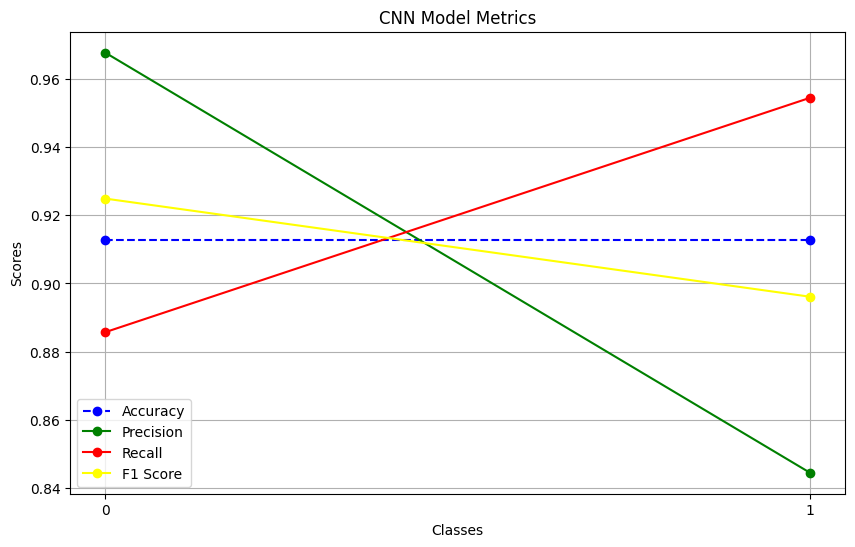

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
maxlen = max(len(sequence) for sequence in X_train_sequences)

# Pad sequences to ensure uniform length
X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=maxlen)

# Define CNN architecture
embedding_dim = 100

model = Sequential([
    Embedding(vocab_size, embedding_dim),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test_padded)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
accuracy_0 = report['0']
accuracy_1 = report['1']
precision_0 = accuracy_0['precision']
precision_1 = accuracy_1['precision']
recall_0 = accuracy_0['recall']
recall_1 = accuracy_1['recall']
f1_0 = accuracy_0['f1-score']
f1_1 = accuracy_1['f1-score']

print("Accuracy:", accuracy)
print("Precision Class 0:", precision_0)
print("Precision Class 1:", precision_1)
print("Recall Class 0:", recall_0)
print("Recall Class 1:", recall_1)
print("F1 Score Class 0:", f1_0)
print("F1 Score Class 1:", f1_1)

# Plotting CNN model metrics
classes = ['0', '1']
metrics_accuracy = [accuracy, accuracy]  # Single accuracy value for both classes
metrics_precision = [precision_0, precision_1]
metrics_recall = [recall_0, recall_1]
metrics_f1 = [f1_0, f1_1]
colors = ['blue', 'green', 'red', 'yellow']
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))

plt.plot(classes, metrics_accuracy, marker='o', linestyle='--', color='blue', label='Accuracy')
plt.plot(classes, metrics_precision, marker='o', color='green', label='Precision')
plt.plot(classes, metrics_recall, marker='o', color='red', label='Recall')
plt.plot(classes, metrics_f1, marker='o', color='yellow', label='F1 Score')

plt.title('CNN Model Metrics')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)  # Adding grid
plt.show()


In [14]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
# Generating classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculating overall metrics
overall_accuracy = accuracy_score(y_test, y_pred)
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1 = f1_score(y_test, y_pred, average='weighted')

print("Overall Accuracy:", overall_accuracy)
print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.92      2424
           1       0.84      0.95      0.90      1577

    accuracy                           0.91      4001
   macro avg       0.91      0.92      0.91      4001
weighted avg       0.92      0.91      0.91      4001

Overall Accuracy: 0.9127718070482379
Overall Precision: 0.9190737905892188
Overall Recall: 0.9127718070482379
Overall F1 Score: 0.9135079074880144
